<a href="https://colab.research.google.com/github/virajvaidya/TimeSeriesForecasting-/blob/main/CoalARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statsmodels==0.13.1

In [2]:
import pandas            as pd
import matplotlib.pyplot as plt
import statsmodels.api   as sm
import seaborn           as sns
import numpy             as np

from scipy.stats                            import t
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from datetime                               import datetime
from statsmodels.tsa.stattools              import adfuller
from statsmodels.tsa.arima.model            import ARIMA

In [3]:
sns.set_style('whitegrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

In [4]:
from google.colab import files
import io
uploaded = files.upload()

Saving auscoal.xlsx to auscoal.xlsx


In [19]:
df = pd.read_excel('auscoal.xlsx')

In [68]:
df.index = pd.date_range(start='11/01/2001', periods=241, freq='M')

In [66]:
df = df.rename(columns={"Price": "CoalPrice"})

In [69]:
df.head()

,CoalPrice,CoalPrice_D1
2001-11-30,56.84,NaN
2001-12-31,53.15,-3.69
2002-01-31,52.92,-0.23
2002-02-28,54.77,1.85
2002-03-31,53.02,-1.75


In [71]:
df.tail()

,CoalPrice,CoalPrice_D1
2021-07-31,204.88,34.85
2021-08-31,232.38,27.50
2021-09-30,254.19,21.81
2021-10-31,303.15,48.96
2021-11-30,214.97,-88.18


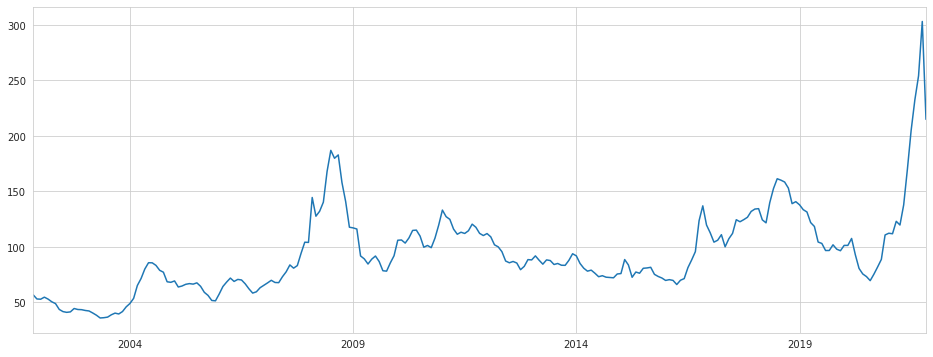

In [70]:
df['CoalPrice'].plot()
plt.show()

#Augmented Dickey-Fuller (ADF) Test of Stationarity for the Coal Price

In [23]:
df2 = df
X = df2['CoalPrice'].values

result1 = adfuller(X, regression='ct', maxlag=3     , regresults=True, store=True)
result2 = adfuller(X, regression='ct', autolag='BIC', regresults=True, store=True)

out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'

print(out.format(result1[0], result1[1], result1[2]))
print(out.format(result2[0], result2[1], result2[2]))

 ADF statistic: -3.769, 
 p-value: 0.018, 
 critical value: {'1%': -3.9973200578432064, '5%': -3.4290999471622556, '10%': -3.1379848180498104}
 ADF statistic: -3.769, 
 p-value: 0.018, 
 critical value: {'1%': -3.9973200578432064, '5%': -3.4290999471622556, '10%': -3.1379848180498104}


# Augmented Dickey-Fuller Test of Stationarity for the First-Order Difference of the Coal Price

In [24]:
df2['CoalPrice_D1'] = df2['CoalPrice'].diff()

df2  = df2.dropna(axis = 0)
X   = df2['CoalPrice_D1'].values

result1 = adfuller(X, regression='ct', maxlag=3     , regresults=True, store=True)
result2 = adfuller(X, regression='ct', autolag='BIC', regresults=True, store=True)

out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'

print(out.format(result1[0], result1[1], result1[2]))
print(out.format(result2[0], result2[1], result2[2]))

 ADF statistic: -7.751, 
 p-value: 0.000, 
 critical value: {'1%': -3.9973200578432064, '5%': -3.4290999471622556, '10%': -3.1379848180498104}
 ADF statistic: -10.842, 
 p-value: 0.000, 
 critical value: {'1%': -3.99715658668426, '5%': -3.4290213886201637, '10%': -3.137938763154836}


#Augmented Dickey-Fuller Test of Stationarity of the Second Order Difference of the Coal Price

In [25]:
df2['CoalPrice_D2'] = df2['CoalPrice_D1'].diff()

df2  = df2.dropna(axis = 0)
X   = df2['CoalPrice_D2'].values

result1 = adfuller(X, regression='ct', maxlag=3     , regresults=True, store=True)
result2 = adfuller(X, regression='ct', autolag='BIC', regresults=True, store=True)

out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'

print(out.format(result1[0], result1[1], result1[2]))
print(out.format(result2[0], result2[1], result2[2]))

 ADF statistic: -9.154, 
 p-value: 0.000, 
 critical value: {'1%': -3.997818933858586, '5%': -3.4293396709977557, '10%': -3.13812535054853}
 ADF statistic: -9.556, 
 p-value: 0.000, 
 critical value: {'1%': -3.998158754122054, '5%': -3.429502948077832, '10%': -3.1382210632264758}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#Augmented Dickey-Fuller Test of Stationarity of the Third Order Difference of the Coal Price

In [26]:
df2['CoalPrice_D3'] = df2['CoalPrice_D2'].diff()

df2 = df2.dropna(axis = 0)
X  = df2['CoalPrice_D3'].values

result1 = adfuller(X, regression='ct', maxlag=3     , regresults=True, store=True)
result2 = adfuller(X, regression='ct', autolag='BIC', regresults=True, store=True)

out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'

print(out.format(result1[0], result1[1], result1[2]))
print(out.format(result2[0], result2[1], result2[2]))

 ADF statistic: -12.610, 
 p-value: 0.000, 
 critical value: {'1%': -3.9979881078231756, '5%': -3.4294209574472734, '10%': -3.138173000968399}
 ADF statistic: -8.637, 
 p-value: 0.000, 
 critical value: {'1%': -3.999214656236089, '5%': -3.4300102058154156, '10%': -3.1385183923675672}


#Augmented Dickey-Fuller Test of Stationarity of the Fourth Order Difference of the Coal Price

In [27]:
df2['CoalPrice_D4'] = df2['CoalPrice_D3'].diff()

df2 = df2.dropna(axis = 0)
X  = df2['CoalPrice_D4'].values

result1 = adfuller(X, regression='ct', maxlag=3     , regresults=True, store=True)
result2 = adfuller(X, regression='ct', autolag='BIC', regresults=True, store=True)

out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'

print(out.format(result1[0], result1[1], result1[2]))
print(out.format(result2[0], result2[1], result2[2]))

 ADF statistic: -18.175, 
 p-value: 0.000, 
 critical value: {'1%': -3.998158754122054, '5%': -3.429502948077832, '10%': -3.1382210632264758}
 ADF statistic: -8.416, 
 p-value: 0.000, 
 critical value: {'1%': -4.000138811415506, '5%': -3.430454069218963, '10%': -3.1387785328059983}


#Augmented Dickey-Fuller Test of Stationarity of the Fourth Order Difference of the Coal Price

In [28]:
df2['CoalPrice_D5'] = df2['CoalPrice_D4'].diff()

df2 = df2.dropna(axis = 0)
X  = df2['CoalPrice_D5'].values

result1 = adfuller(X, regression='ct', maxlag=3     , regresults=True, store=True)
result2 = adfuller(X, regression='ct', autolag='BIC', regresults=True, store=True)

out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'

print(out.format(result1[0], result1[1], result1[2]))
print(out.format(result2[0], result2[1], result2[2]))

 ADF statistic: -21.856, 
 p-value: 0.000, 
 critical value: {'1%': -3.9983308920613543, '5%': -3.4295856520805996, '10%': -3.1382695426857397}
 ADF statistic: -9.146, 
 p-value: 0.000, 
 critical value: {'1%': -4.000520408996994, '5%': -3.4306373191209616, '10%': -3.138885924117205}


#Choosing optimal p and q values

In [29]:
df2 = df
df2['CoalPrice_D1'] = df2['CoalPrice'].diff()
df2 = df2.dropna(axis = 0)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


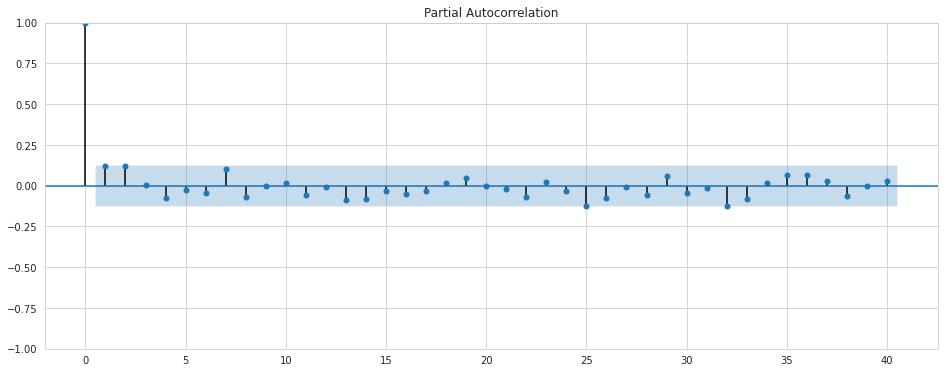

In [30]:
sm.graphics.tsa.plot_pacf(df2['CoalPrice_D1'].values.squeeze(), lags=40)
plt.show()

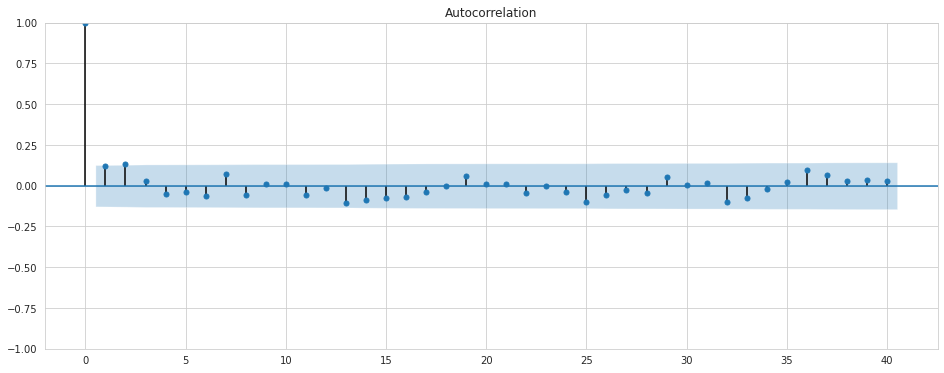

In [31]:
sm.graphics.tsa.plot_acf(df2['CoalPrice_D1'].values.squeeze(), lags=40)
plt.show()

#We start from p = q = 7 and reduce their values one by one

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:              CoalPrice   No. Observations:                  239
Model:                 ARIMA(7, 1, 7)   Log Likelihood                -825.439
Date:                Thu, 16 Dec 2021   AIC                           1680.878
Time:                        06:24:13   BIC                           1732.963
Sample:                    02-28-2002   HQIC                          1701.869
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6991      0.159      4.406      0.000       0.388       1.010
ar.L2          0.1300      0.215      0.605      0.545      -0.292       0.552
ar.L3         -0.0468      0.200     -0.233      0.8

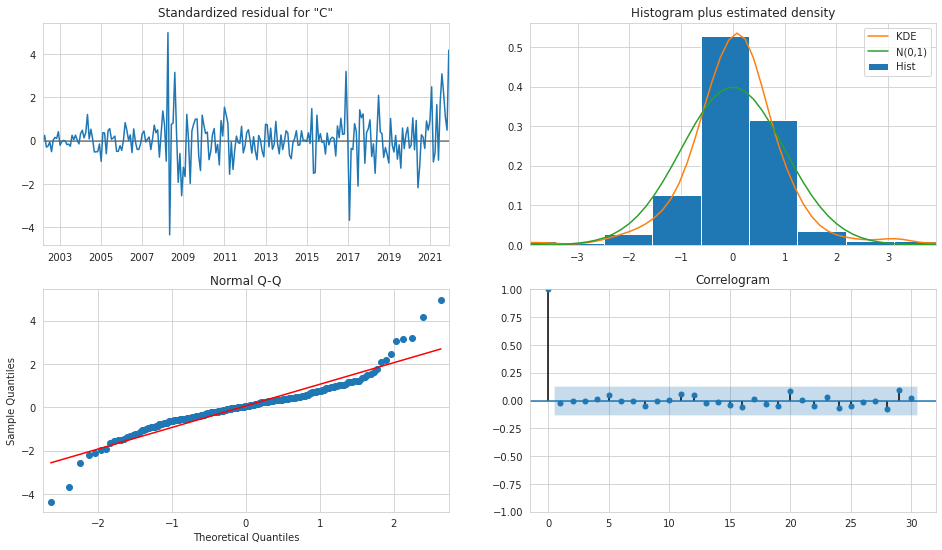

In [72]:
mod = ARIMA(df2['CoalPrice'][df2.index.year<=2021], order=(7,1,7))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:              CoalPrice   No. Observations:                  239
Model:                 ARIMA(6, 1, 7)   Log Likelihood                -826.079
Date:                Thu, 16 Dec 2021   AIC                           1680.158
Time:                        06:24:27   BIC                           1728.770
Sample:                    02-28-2002   HQIC                          1699.749
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7859      0.144      5.454      0.000       0.503       1.068
ar.L2          0.3121      0.170      1.838      0.066      -0.021       0.645
ar.L3         -0.3890      0.161     -2.415      0.0

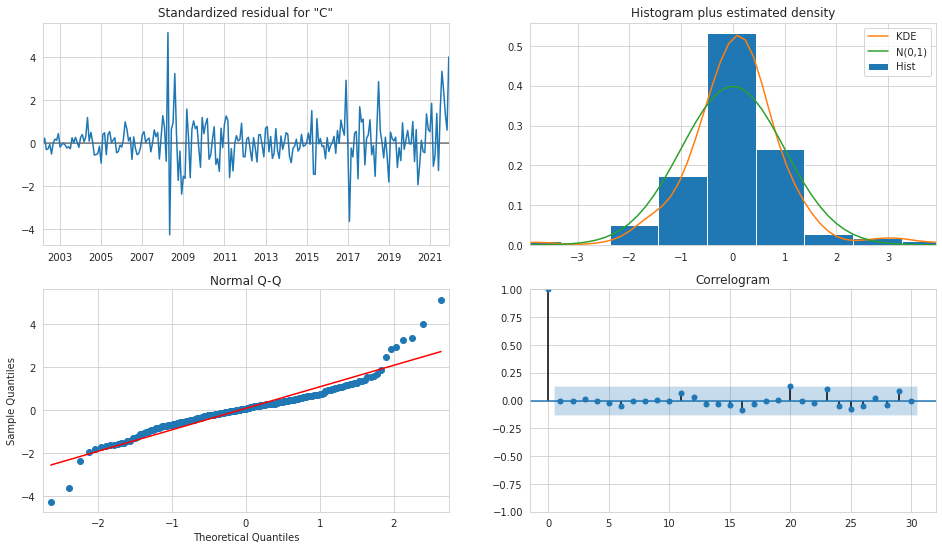

In [73]:
mod = ARIMA(df2['CoalPrice'][df2.index.year<=2021], order=(6,1,7))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:              CoalPrice   No. Observations:                  239
Model:                 ARIMA(7, 1, 6)   Log Likelihood                -826.944
Date:                Thu, 16 Dec 2021   AIC                           1681.888
Time:                        06:24:37   BIC                           1730.500
Sample:                    02-28-2002   HQIC                          1701.480
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3613      1.213      0.298      0.766      -2.016       2.739
ar.L2          0.0626      0.623      0.100      0.920      -1.159       1.284
ar.L3          0.1050      0.267      0.393      0.6

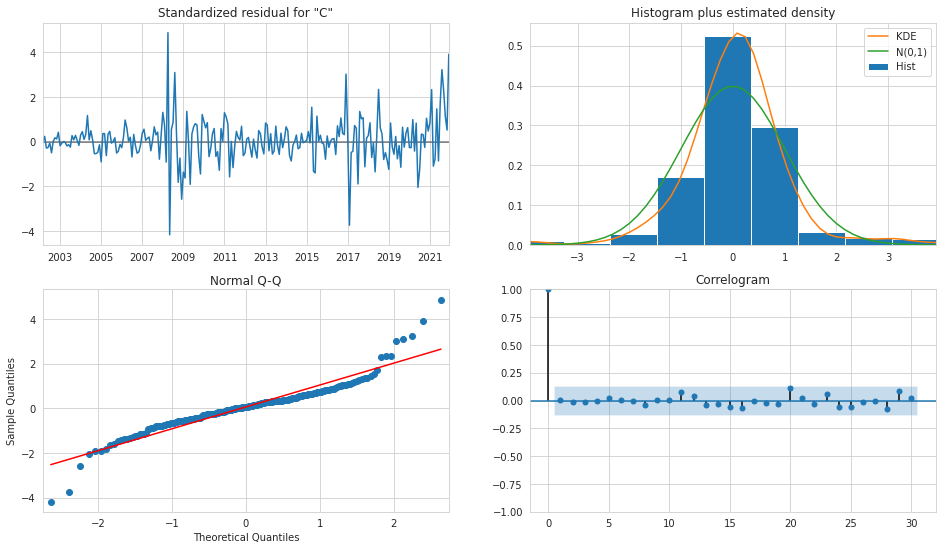

In [74]:
mod = ARIMA(df2['CoalPrice'][df2.index.year<=2021], order=(7,1,6))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:              CoalPrice   No. Observations:                  239
Model:                 ARIMA(6, 1, 6)   Log Likelihood                -826.791
Date:                Thu, 16 Dec 2021   AIC                           1679.582
Time:                        06:24:49   BIC                           1724.721
Sample:                    02-28-2002   HQIC                          1697.774
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5176      0.536     -0.966      0.334      -1.568       0.533
ar.L2         -0.0030      0.253     -0.012      0.991      -0.499       0.493
ar.L3         -0.2136      0.159     -1.343      0.1

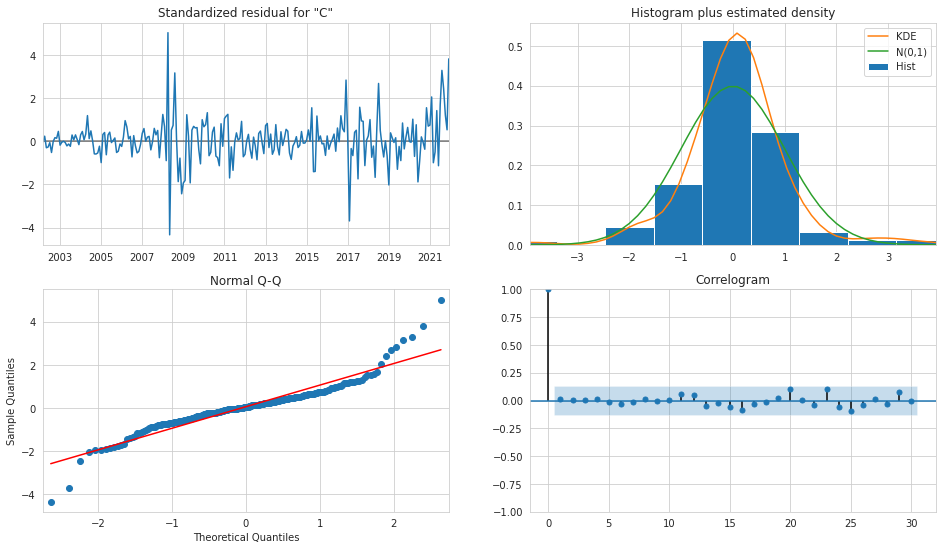

In [75]:
mod = ARIMA(df2['CoalPrice'][df2.index.year<=2021], order=(6,1,6))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:              CoalPrice   No. Observations:                  239
Model:                 ARIMA(5, 1, 6)   Log Likelihood                -827.786
Date:                Thu, 16 Dec 2021   AIC                           1679.572
Time:                        06:25:03   BIC                           1721.239
Sample:                    02-28-2002   HQIC                          1696.365
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0879      0.225      0.391      0.696      -0.353       0.528
ar.L2          0.3237      0.155      2.085      0.037       0.019       0.628
ar.L3         -0.5871      0.099     -5.939      0.0

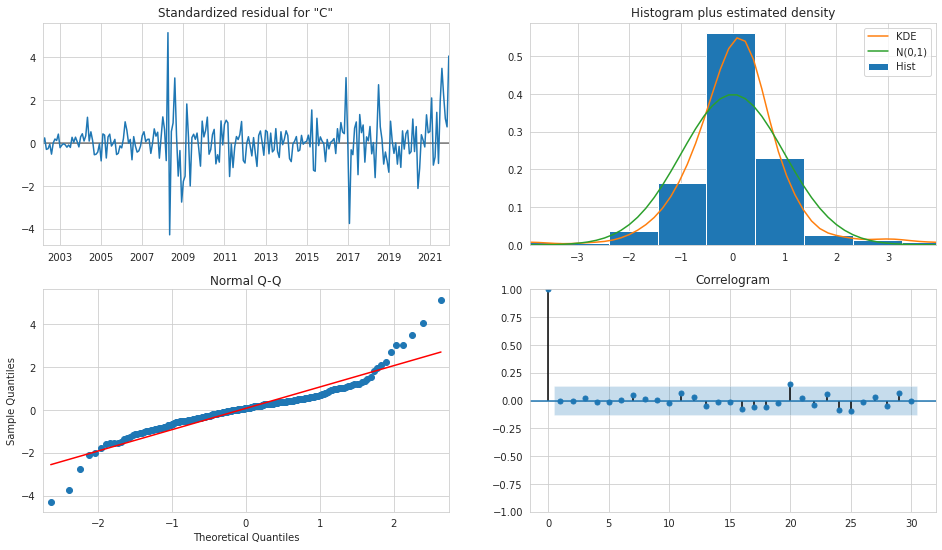

In [76]:
mod = ARIMA(df2['CoalPrice'][df2.index.year<=2021], order=(5,1,6))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:              CoalPrice   No. Observations:                  239
Model:                 ARIMA(6, 1, 5)   Log Likelihood                -828.217
Date:                Thu, 16 Dec 2021   AIC                           1680.434
Time:                        06:25:13   BIC                           1722.102
Sample:                    02-28-2002   HQIC                          1697.227
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0164      0.711     -0.023      0.982      -1.409       1.376
ar.L2          0.3625      0.143      2.537      0.011       0.082       0.643
ar.L3         -0.5869      0.235     -2.493      0.0

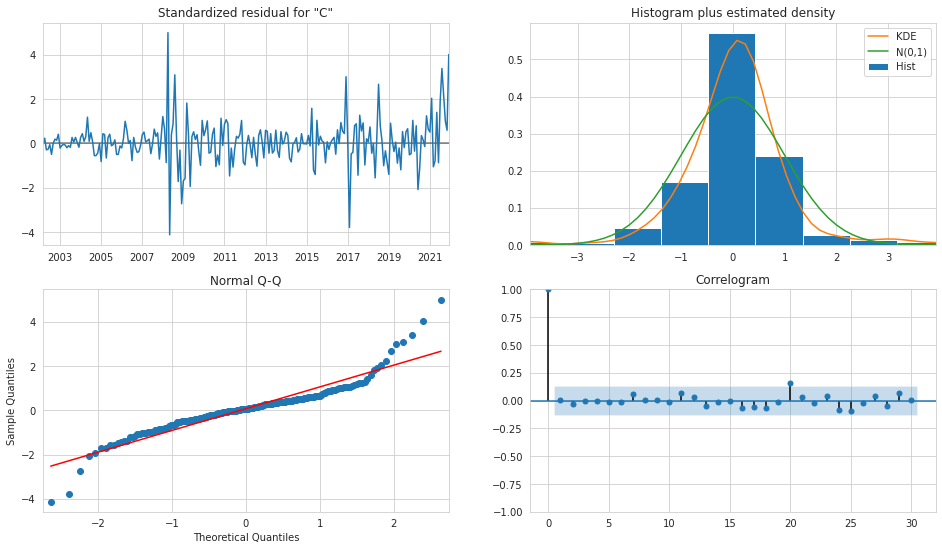

In [77]:
mod = ARIMA(df2['CoalPrice'][df2.index.year<=2021], order=(6,1,5))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [78]:
mod = ARIMA(df2['CoalPrice'][df2.index.year<=2021], order=(5,1,5))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:              CoalPrice   No. Observations:                  239
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -827.362
Date:                Thu, 16 Dec 2021   AIC                           1676.724
Time:                        06:25:22   BIC                           1714.919
Sample:                    02-28-2002   HQIC                          1692.118
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3016      0.190     -1.588      0.112      -0.674       0.071
ar.L2          0.0376      0.190      0.198      0.843      -0.334       0.410
ar.L3         -0.4848      0.102     -4.736      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:              CoalPrice   No. Observations:                  239
Model:                 ARIMA(4, 1, 5)   Log Likelihood                -828.743
Date:                Thu, 16 Dec 2021   AIC                           1677.485
Time:                        06:26:00   BIC                           1712.208
Sample:                    02-28-2002   HQIC                          1691.479
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1527      0.602      0.254      0.800      -1.028       1.333
ar.L2          1.2232      0.458      2.669      0.008       0.325       2.122
ar.L3          0.1740      0.373      0.467      0.6

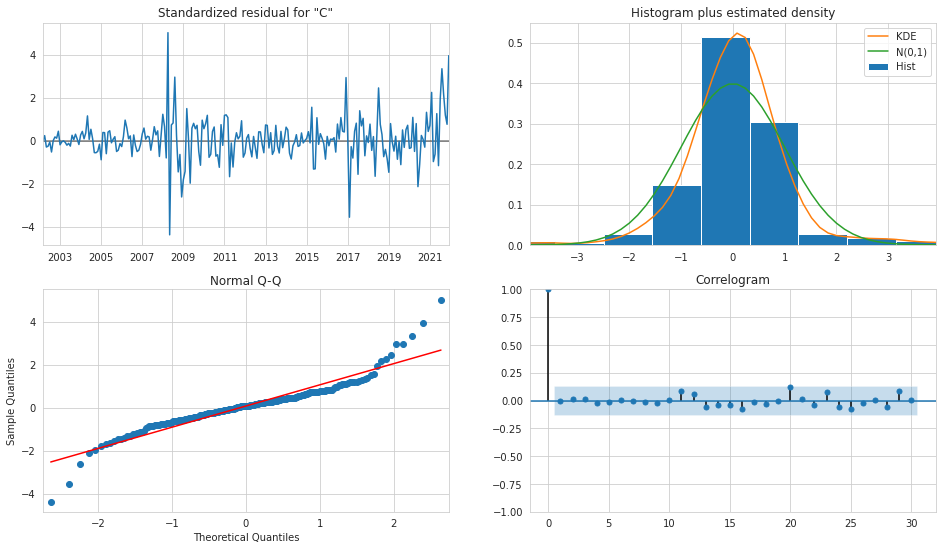

In [79]:
mod = ARIMA(df2['CoalPrice'][df2.index.year<=2021], order=(4,1,5))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:              CoalPrice   No. Observations:                  239
Model:                 ARIMA(5, 1, 4)   Log Likelihood                -828.848
Date:                Thu, 16 Dec 2021   AIC                           1677.697
Time:                        06:26:08   BIC                           1712.419
Sample:                    02-28-2002   HQIC                          1691.690
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1135      0.753     -1.479      0.139      -2.589       0.362
ar.L2          0.3925      0.727      0.540      0.589      -1.032       1.817
ar.L3          1.0228      0.802      1.275      0.2

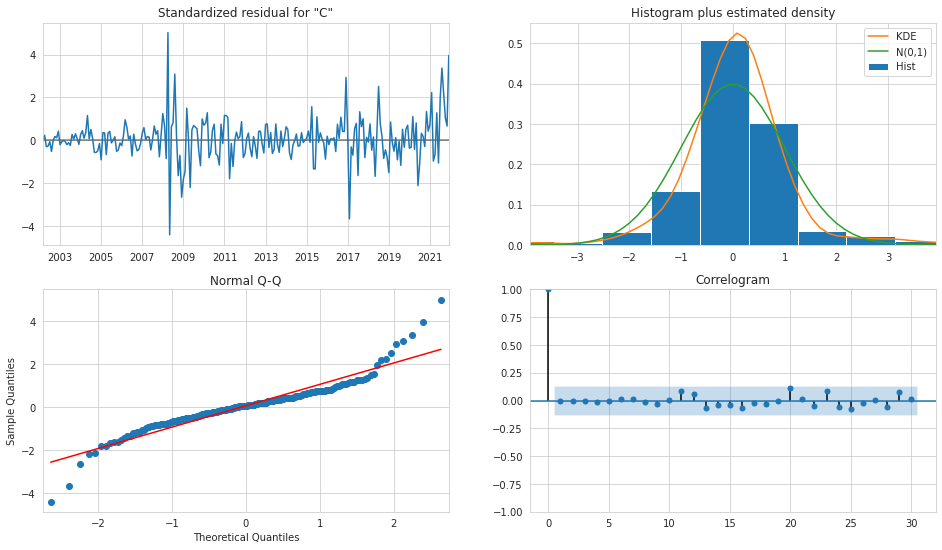

In [80]:
mod = ARIMA(df2['CoalPrice'][df2.index.year<=2021], order=(5,1,4))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:              CoalPrice   No. Observations:                  239
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -828.884
Date:                Thu, 16 Dec 2021   AIC                           1675.768
Time:                        06:26:17   BIC                           1707.019
Sample:                    02-28-2002   HQIC                          1688.363
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9459      0.763     -1.241      0.215      -2.440       0.549
ar.L2          0.3719      0.744      0.500      0.617      -1.086       1.830
ar.L3          0.7844      0.313      2.507      0.0

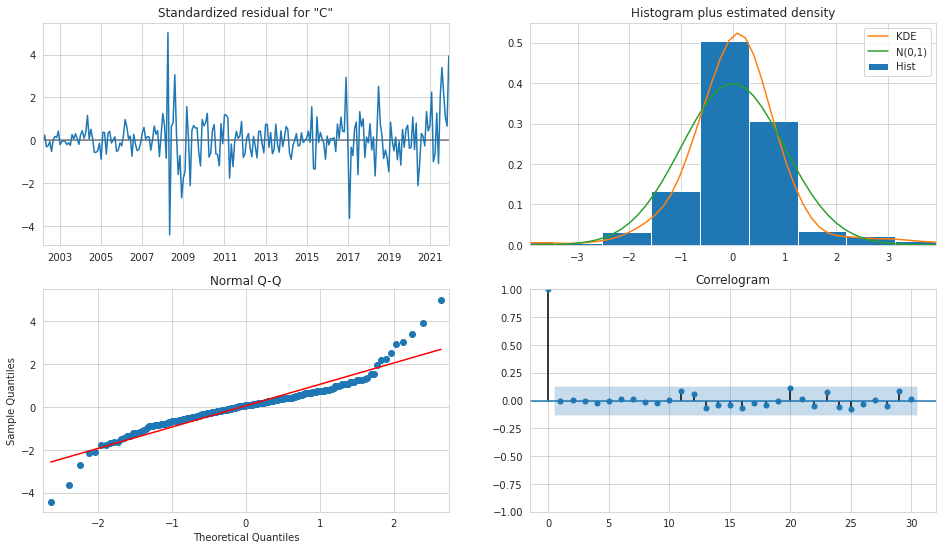

In [81]:
mod = ARIMA(df2['CoalPrice'][df2.index.year<=2021], order=(4,1,4))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

                               SARIMAX Results                                
Dep. Variable:              CoalPrice   No. Observations:                  239
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -828.907
Date:                Thu, 16 Dec 2021   AIC                           1673.815
Time:                        06:26:24   BIC                           1701.593
Sample:                    02-28-2002   HQIC                          1685.010
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7543      0.200     -3.777      0.000      -1.146      -0.363
ar.L2          0.5540      0.159      3.493      0.000       0.243       0.865
ar.L3          0.7039      0.130      5.405      0.0

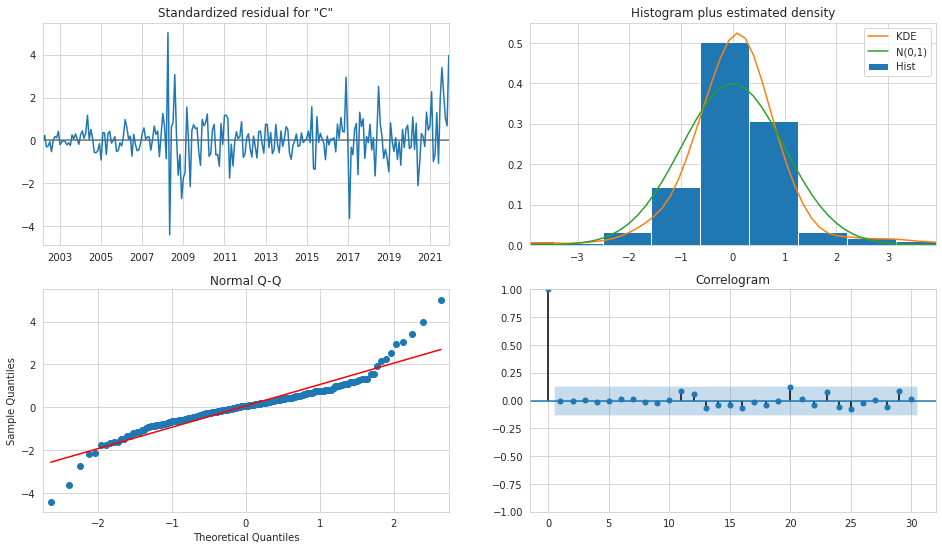

In [82]:
mod = ARIMA(df2['CoalPrice'][df2.index.year<=2021], order=(3,1,4))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:              CoalPrice   No. Observations:                  239
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -829.156
Date:                Thu, 16 Dec 2021   AIC                           1674.311
Time:                        06:26:33   BIC                           1702.090
Sample:                    02-28-2002   HQIC                          1685.507
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4456      0.503     -0.886      0.376      -1.431       0.540
ar.L2          0.8465      0.382      2.217      0.027       0.098       1.595
ar.L3          0.5300      0.204      2.595      0.0

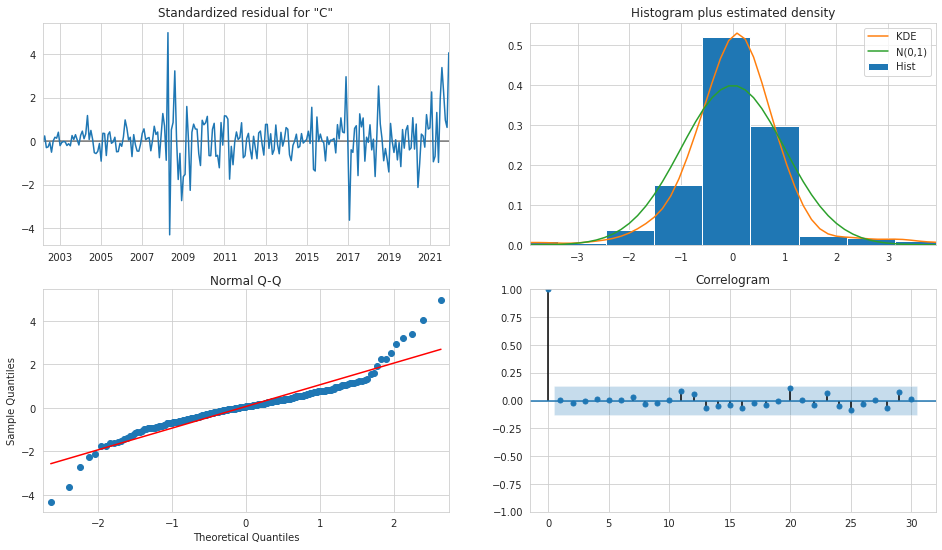

In [83]:
mod = ARIMA(df2['CoalPrice'][df2.index.year<=2021], order=(4,1,3))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:              CoalPrice   No. Observations:                  239
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -831.280
Date:                Thu, 16 Dec 2021   AIC                           1676.560
Time:                        06:26:44   BIC                           1700.866
Sample:                    02-28-2002   HQIC                          1686.356
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1193      0.079     -1.508      0.132      -0.274       0.036
ar.L2         -0.2504      0.083     -3.011      0.003      -0.413      -0.087
ar.L3          0.7098      0.075      9.521      0.0

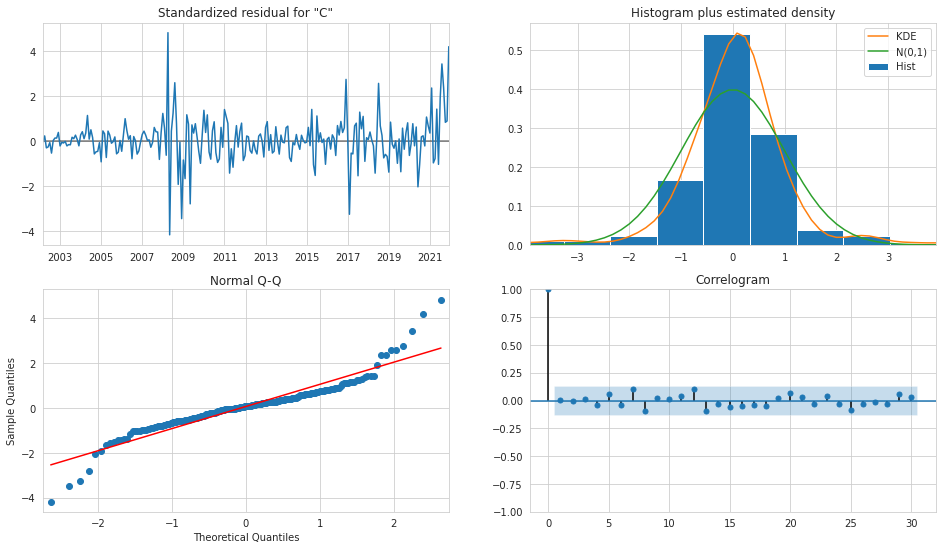

In [84]:
mod = ARIMA(df2['CoalPrice'][df2.index.year<=2021], order=(3,1,3))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:              CoalPrice   No. Observations:                  239
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -831.354
Date:                Thu, 16 Dec 2021   AIC                           1674.708
Time:                        06:26:54   BIC                           1695.542
Sample:                    02-28-2002   HQIC                          1683.105
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1836      0.080     -2.290      0.022      -0.341      -0.026
ar.L2          0.7365      0.078      9.501      0.000       0.585       0.888
ma.L1          0.5766      0.303      1.905      0.0

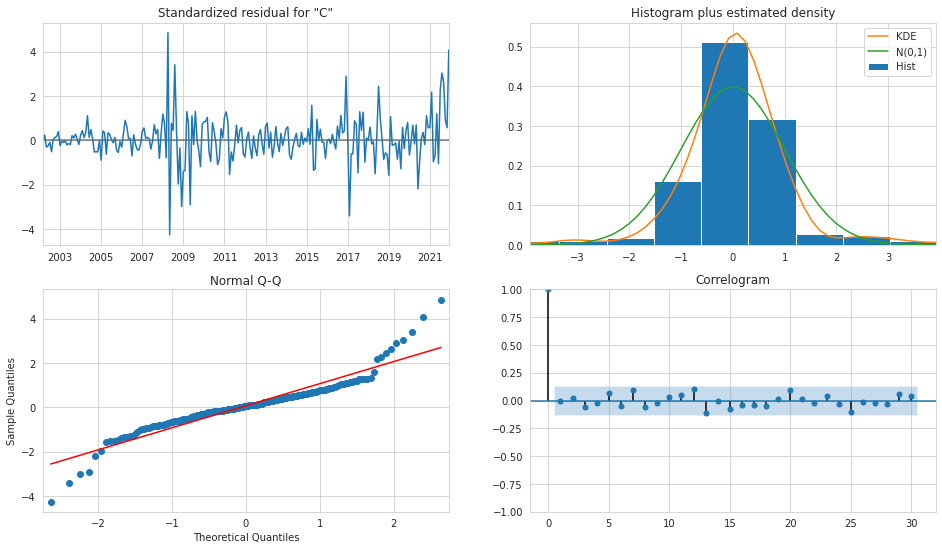

In [85]:
mod = ARIMA(df2['CoalPrice'][df2.index.year<=2021], order=(2,1,3))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:              CoalPrice   No. Observations:                  239
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -831.295
Date:                Thu, 16 Dec 2021   AIC                           1674.589
Time:                        06:27:04   BIC                           1695.423
Sample:                    02-28-2002   HQIC                          1682.986
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4121      0.207     -1.988      0.047      -0.818      -0.006
ar.L2          0.6473      0.108      5.985      0.000       0.435       0.859
ar.L3          0.1309      0.109      1.203      0.2

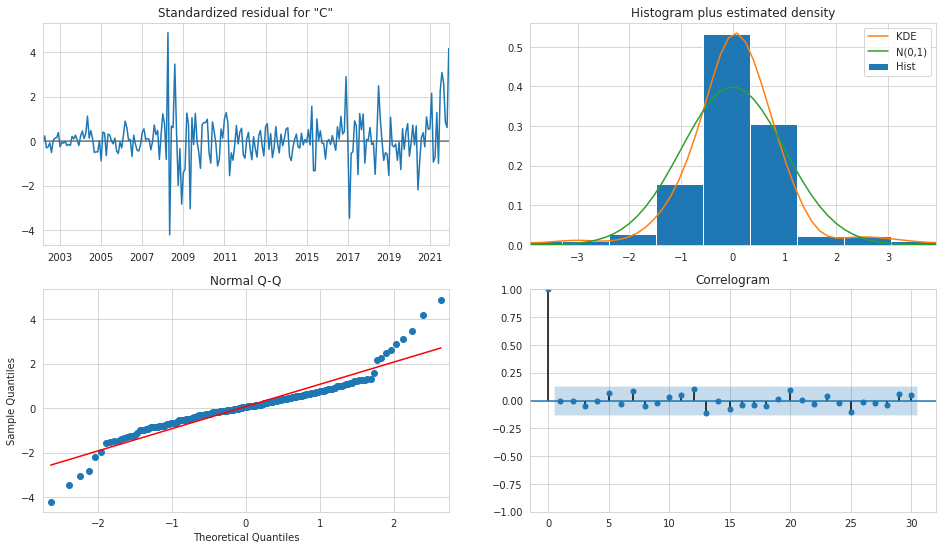

In [86]:
mod = ARIMA(df2['CoalPrice'][df2.index.year<=2021], order=(3,1,2))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

                               SARIMAX Results                                
Dep. Variable:              CoalPrice   No. Observations:                  239
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -833.038
Date:                Thu, 16 Dec 2021   AIC                           1676.076
Time:                        06:27:17   BIC                           1693.437
Sample:                    02-28-2002   HQIC                          1683.073
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3254      1.822      0.727      0.467      -2.247       4.897
ar.L2         -0.4054      1.463     -0.277      0.782      -3.273       2.462
ma.L1         -0.9511      1.829     -0.520      0.6

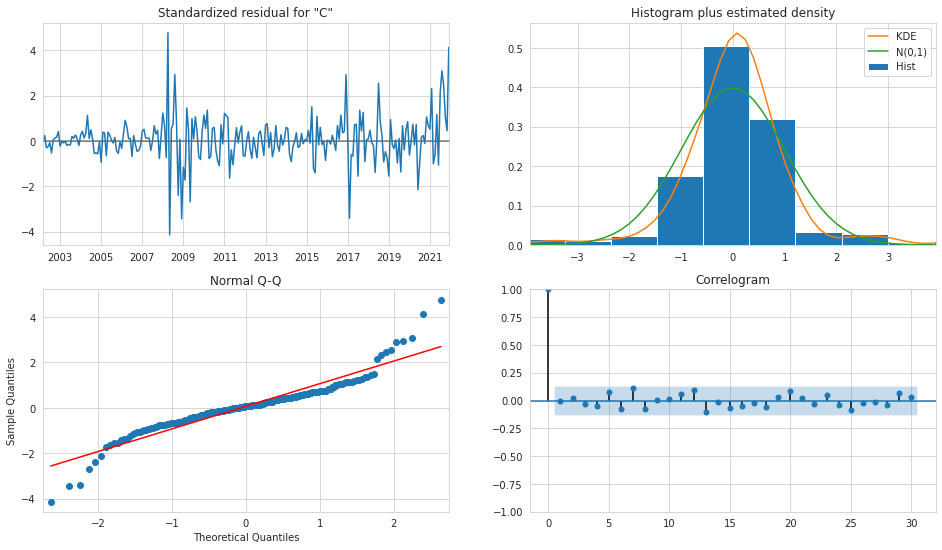

In [87]:
mod = ARIMA(df2['CoalPrice'][df2.index.year<=2021], order=(2,1,2))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

                               SARIMAX Results                                
Dep. Variable:              CoalPrice   No. Observations:                  239
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -833.102
Date:                Thu, 16 Dec 2021   AIC                           1674.204
Time:                        06:27:28   BIC                           1688.093
Sample:                    02-28-2002   HQIC                          1679.802
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7942      0.073     10.846      0.000       0.651       0.938
ma.L1         -0.4248      0.095     -4.453      0.000      -0.612      -0.238
ma.L2         -0.0029      0.061     -0.048      0.9

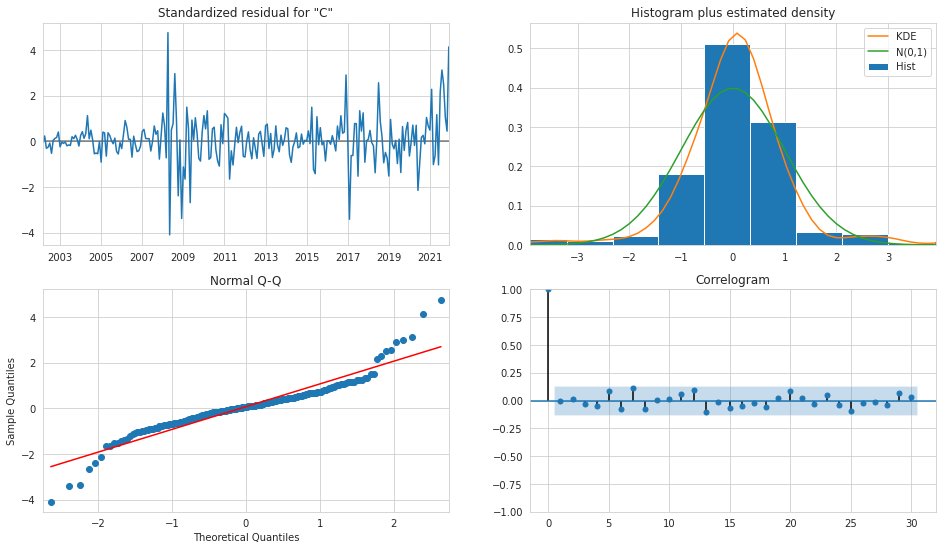

In [88]:
mod = ARIMA(df2['CoalPrice'][df2.index.year<=2021], order=(1,1,2))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

                               SARIMAX Results                                
Dep. Variable:              CoalPrice   No. Observations:                  239
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -833.102
Date:                Thu, 16 Dec 2021   AIC                           1674.204
Time:                        06:27:36   BIC                           1688.093
Sample:                    02-28-2002   HQIC                          1679.801
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8081      0.196      4.118      0.000       0.423       1.193
ar.L2         -0.0093      0.115     -0.081      0.936      -0.234       0.216
ma.L1         -0.4383      0.198     -2.213      0.0

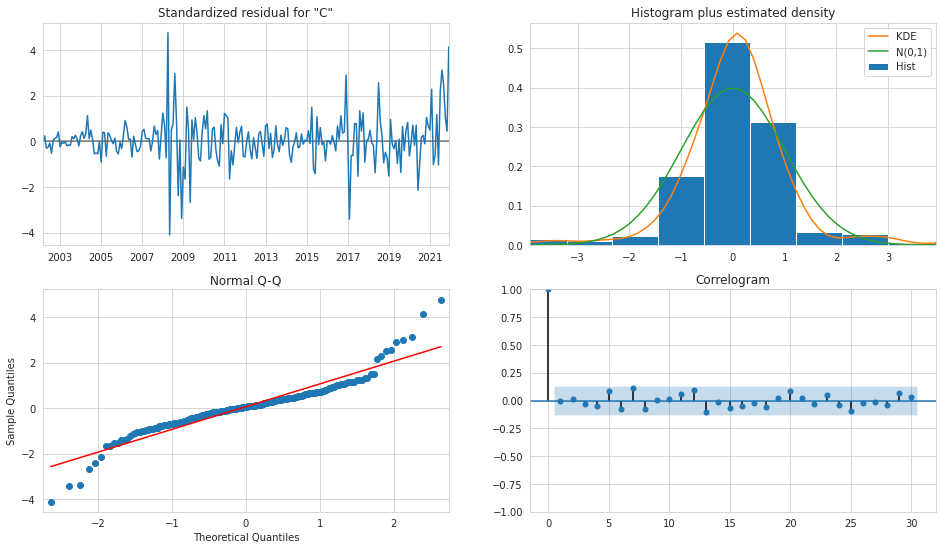

In [89]:
mod = ARIMA(df2['CoalPrice'][df2.index.year<=2021], order=(2,1,1))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

                               SARIMAX Results                                
Dep. Variable:              CoalPrice   No. Observations:                  239
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -833.103
Date:                Thu, 16 Dec 2021   AIC                           1672.205
Time:                        06:27:45   BIC                           1682.622
Sample:                    02-28-2002   HQIC                          1676.403
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7909      0.060     13.228      0.000       0.674       0.908
ma.L1         -0.4220      0.090     -4.704      0.000      -0.598      -0.246
sigma2        64.1642      3.459     18.549      0.0

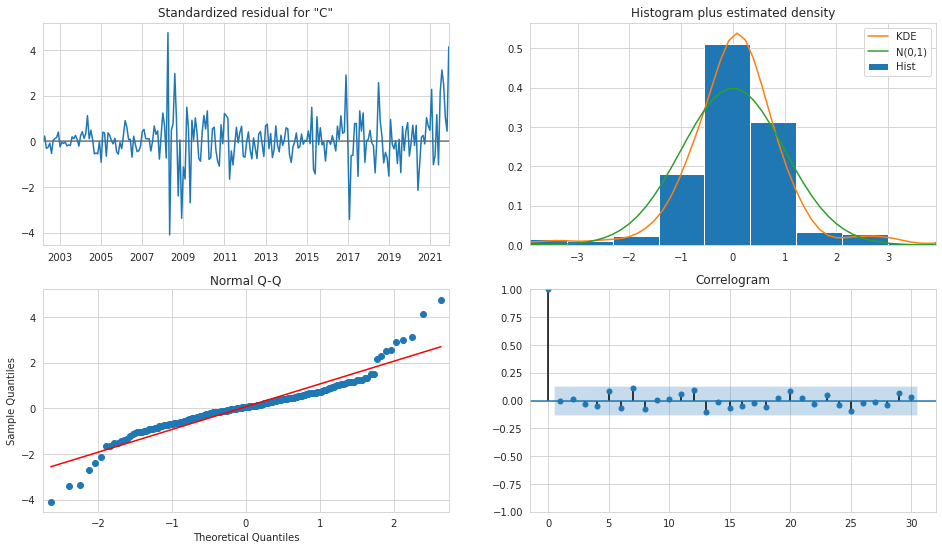

In [90]:
mod = ARIMA(df2['CoalPrice'][df2.index.year<=2021], order=(1,1,1))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

                               SARIMAX Results                                
Dep. Variable:              CoalPrice   No. Observations:                  239
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -845.041
Date:                Thu, 16 Dec 2021   AIC                           1694.081
Time:                        06:28:00   BIC                           1701.026
Sample:                    02-28-2002   HQIC                          1696.880
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3251      0.037      8.865      0.000       0.253       0.397
sigma2        71.0109      3.132     22.672      0.000      64.872      77.150
Ljung-Box (L1) (Q):                   1.14   Jarque-

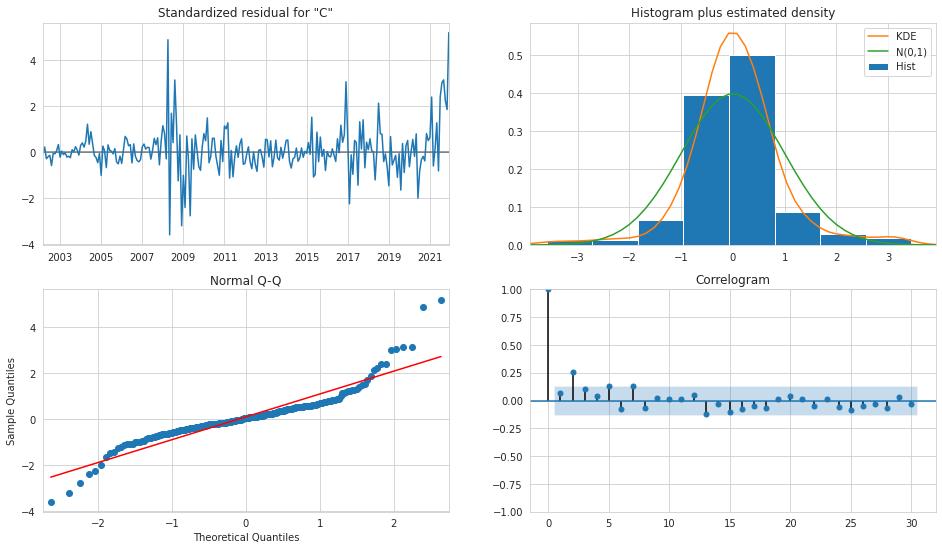

In [91]:
mod = ARIMA(df2['CoalPrice'][df2.index.year<=2021], order=(0,1,1))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

                               SARIMAX Results                                
Dep. Variable:              CoalPrice   No. Observations:                  239
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -837.380
Date:                Thu, 16 Dec 2021   AIC                           1678.760
Time:                        06:28:10   BIC                           1685.704
Sample:                    02-28-2002   HQIC                          1681.559
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4511      0.032     14.233      0.000       0.389       0.513
sigma2        66.5509      2.979     22.344      0.000      60.713      72.389
Ljung-Box (L1) (Q):                   1.54   Jarque-

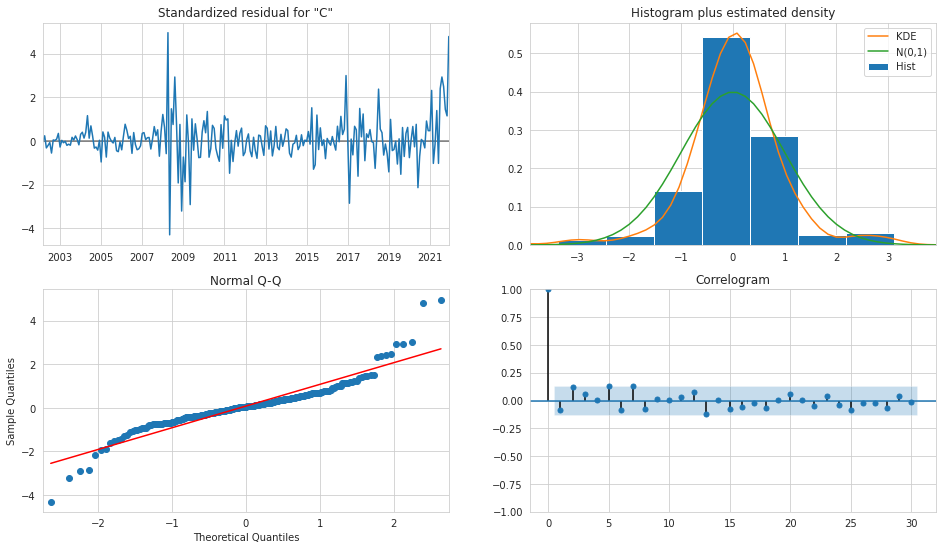

In [92]:
mod = ARIMA(df2['CoalPrice'][df2.index.year<=2021], order=(1,1,0))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

                               SARIMAX Results                                
Dep. Variable:              CoalPrice   No. Observations:                  239
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -860.886
Date:                Thu, 16 Dec 2021   AIC                           1723.772
Time:                        06:28:19   BIC                           1727.244
Sample:                    02-28-2002   HQIC                          1725.172
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        81.1700      3.543     22.911      0.000      74.226      88.114
Ljung-Box (L1) (Q):                  36.93   Jarque-Bera (JB):               482.73
Prob(Q):                              0.00   Pr

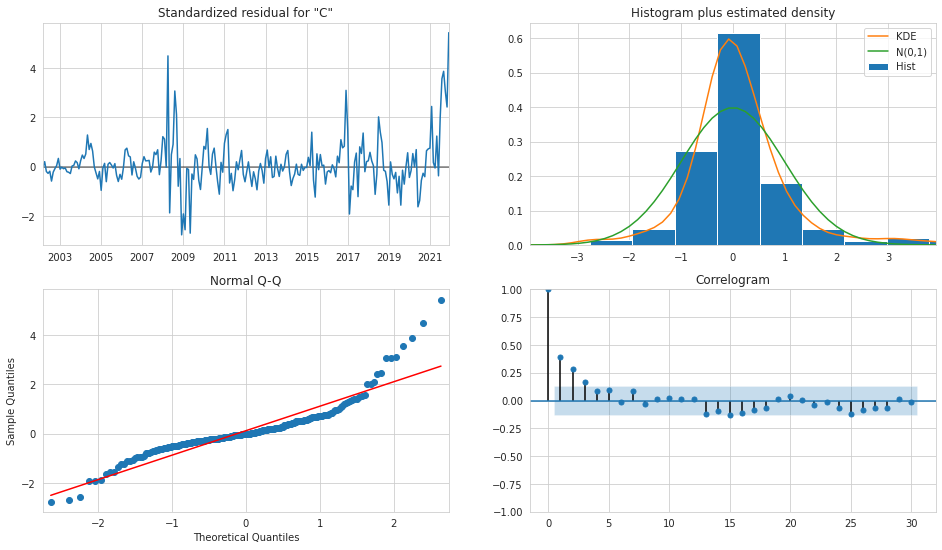

In [93]:
mod = ARIMA(df2['CoalPrice'][df2.index.year<=2021], order=(0,1,0))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

#We use the Akaike and Bayesian Information Criteria to make our choice for the best fitting/optimal values of (p,d,q).

# The (p,d,q) values of (1,1,1) have the lowest AIC and BIC values, and hence we conclude that those (p,d,q) values give us the best fit.

In [94]:
mod = ARIMA(df2['CoalPrice'][df2.index.year<=2021], order=(1,1,0))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:              CoalPrice   No. Observations:                  239
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -837.380
Date:                Thu, 16 Dec 2021   AIC                           1678.760
Time:                        06:29:44   BIC                           1685.704
Sample:                    02-28-2002   HQIC                          1681.559
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4511      0.032     14.233      0.000       0.389       0.513
sigma2        66.5509      2.979     22.344      0.000      60.713      72.389
Ljung-Box (L1) (Q):                   1.54   Jarque-

#Ljug_Box Test for the residuals

In [95]:
sm.stats.acorr_ljungbox(res.resid, return_df=True)

,lb_stat,lb_pvalue
1,1.193009,0.274723
2,4.163224,0.124729
3,4.595445,0.203933
4,4.595532,0.331370
5,7.544310,0.183202
6,9.392843,0.152660
7,12.707335,0.079568
8,13.853747,0.085658
9,13.926269,0.124972
10,13.963487,0.174664


In [96]:
res.predict()

2002-02-28      0.000000
2002-03-31     53.152003
2002-04-30     52.816238
2002-05-31     55.604609
2002-06-30     52.230505
                 ...    
2021-08-31    146.060143
2021-09-30    184.529636
2021-10-31    220.602225
2021-11-30    244.786347
2021-12-31    264.029361
Freq: M, Name: predicted_mean, Length: 239, dtype: float64

#20 Steps Ahead Forecast for the Coal Price

In [99]:
coalforecast= res.forecast(steps=10)

In [100]:
coalforecast

2022-01-31    325.237809
2022-02-28    335.202500
2022-03-31    339.697970
2022-04-30    341.726056
2022-05-31    342.641006
2022-06-30    343.053777
2022-07-31    343.239994
2022-08-31    343.324004
2022-09-30    343.361904
2022-10-31    343.379003
Freq: M, Name: predicted_mean, dtype: float64